# Project: Wrangling and Analyze Data

## Table of Contents
* [Data Gathering](#DataGathering)
* [Assessing Data](#AssessingData)
    * [Programmatic and Visual Assessment](#assessment)
    * [Quality Issues](#quality)
    * [Tidiness Issues](#tidiness)
* [Cleaning Data](#CleaningData)
    * [Issue 1](#issue_1)
    * [Issue 2](#issue_2)
    * [Issue 3](#issue_3)
    * [Issue 4](#issue_4)
    * [Issue 5](#issue_5)
    * [Issue 6](#issue_6)
    * [Issue 7](#issue_7)
* [Storing Data](#StoringData)
* [Analyzing and Visualizing Data](#AnalyzingData) 
    * [Insights](#insights)
    * [Visualization](#visualization)
* [Reference](#reference)

## Data Gathering <a class="anchor" id="DataGathering"></a>
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import required library
import pandas as pd

#read twitter-archive-enhanced.csd into a dataframe
df_twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

#display few rows of data to confirm upload is done
df_twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#import the required library
import requests

#download the image predictions tsv file
res = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
#confirm if successful
res.status_code

200

In [3]:
#read the content of the tsv file into a dataframe
with open("image_predictions.tsv", mode='wb') as file:
    file.write(res.content)

df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

#display a few rows of data in the dataframe
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#import required libraries
import tweepy
import json
from timeit import default_timer as timer

# get twitter api keys
APIKey = ''
APIKeySecret = ''
AccessToken = ''
AccessTokenSecret = ''

#authenticate the keys
authenticate = tweepy.OAuthHandler(APIKey, APIKeySecret)
authenticate.set_access_token(AccessToken, AccessTokenSecret)

twit_api = tweepy.API(authenticate, wait_on_rate_limit=True)

cnt = 0
failed_dict = {}
start = timer()

twit_id = df_twitter_arch['tweet_id'].values

#create the tweet_json.txt file and write the data from the twitter api into it
with open('tweet_json.txt', mode='w') as outfile:
    for tweet_id in twit_id:
        cnt += 1
        print(str(cnt) + ": " + str(tweet_id))
        try:
            tweets = twit_api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweets._json, outfile)
            outfile.write('\n')
        except tweepy.error.TweepError as e:
            print("Fail")
            failed_dict[tweet_id] = e
            pass
end = timer()
print (end - start)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
553: 804413760345620481
Success


Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809: 771770456517009408
Success
810: 771500966810099713
Success
811: 771380798096281600
Success
812

Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
1065: 740995100998766593
Success
1066: 740711788199743490
Success
1067: 740699697422163968
Success
10

Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
1314: 706904523814649856
Success
1315: 706901761596989440
Success
1316: 706681918348251136
Success
1317: 706644897839910912
Success
1318: 706593038911545345
Success
1319: 706538006853918722
Success
13

Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
1564: 688179443353796608
Success
1565: 688116655151435777
Success
1566: 688064179421470721
Success
1567: 687841446767013888
Success
1568: 687826841265172480
Success
15

Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
18

Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
20

Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
23

In [4]:
# read twitter api data into a dataframe
import json
twitterapi_data = []
with open ('tweet_json.txt') as file:
    for line in file:
        tweets = (json.loads(line))
        twt_id = tweets['id']
        retwt_cnt = tweets['retweet_count']
        fav_cnt = tweets['favorite_count']
        
        twitterapi_data.append({'tweet_id': twt_id,
                        'retweet_count': retwt_cnt,
                        'favorite_count': fav_cnt})
    
    df_twt_apidata = pd.DataFrame(twitterapi_data)

#display a few rows of data in the dataframe
df_twt_apidata.head()

,favorite_count,retweet_count,tweet_id
0,33664,6961,892420643555336193
1,29204,5266,892177421306343426
2,21957,3463,891815181378084864
3,36714,7179,891689557279858688
4,35150,7706,891327558926688256


## Assessing Data <a class="anchor" id="AssessingData"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Programmatic and Visual Assessment <a class="anchor" id="assessment"></a>

In [5]:
#display entire dataframe for visual assessment
df_twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
#Check for null values or incorrect datatypes using the info method
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
#This is to check if there are any null values 
df_twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
#display entire dataframe for visual assessment
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
#This is to check for null values or incorrect datatypes
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_twt_apidata

,favorite_count,retweet_count,tweet_id
0,33664,6961,892420643555336193
1,29204,5266,892177421306343426
2,21957,3463,891815181378084864
3,36714,7179,891689557279858688
4,35150,7706,891327558926688256
5,17730,2583,891087950875897856
6,10320,1644,890971913173991426
7,56553,15666,890729181411237888
8,24403,3599,890609185150312448
9,27808,6060,890240255349198849


In [11]:
#This is to check for null values or incorrect datatypes
df_twt_apidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
tweet_id          2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [12]:
# This is to check if any of the columns have any negative values
df_twt_apidata.describe()

,favorite_count,retweet_count,tweet_id
count,2327.000000,2327.000000,2.327000e+03
mean,7019.299527,2456.114310,7.417930e+17
std,10907.551013,4158.910863,6.820795e+16
min,0.000000,1.000000,6.660209e+17
25%,1218.000000,492.500000,6.781394e+17
50%,3033.000000,1143.000000,7.178418e+17
75%,8553.000000,2843.000000,7.986547e+17
max,144083.000000,70227.000000,8.924206e+17


### Quality issues <a class="anchor" id="quality"></a>
1. Remove all retweets from the df_twitter_arch dataframe


2. df_twitter_arch (twitter archive dataset) -in_reply_to_status_id, in_reply_to_user_ column has numerous null values


3. Change datatypes for columns listed below <br>
  > - timestamp column is a string instead of a datetime column in df_twitter_arch dataframe<br>
  > - tweet_id column should be a string instead of an int datatype in all 3 dataframes<br>
  > - rating_numerator and rating_denominator columns should be of datatype float instead of int in df_twitter_arch dataset<br>

4. df_twitter_arch (twitter archive dataset) - Remove retweet-related columns


5. df_twitter_arch (twitter archive dataset) - HTML tags in the source column


6. For some of the tweet ids in the twitter archive dataset there are no corresponding data values in the dataset retrieved via the Twitter API or the image prediction dataset.


7. 'None' in the dog stages columns (doggo, floofer, pupper and puppo) is treated as a non-null value instead of being null values.


8. Some column headers in the df_image_predictions dataframe are non-descriptive (p1, p1_conf, p1_dog, p2, p2_conf, etc)

### Tidiness issues <a class="anchor" id="tidiness"></a>
1. The dog stages in the twitter archive dataset have been split into separate columns instead of being one column with a dog's stage indicated


2. Tweets about the dogs are spread accross 3 different files/dataframes.

## Cleaning Data <a class="anchor" id="CleaningData"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
df_twit_arch_copy = df_twitter_arch.copy()
df_img_predict_copy = df_image_predictions.copy()
df_twt_apidata_copy = df_twt_apidata.copy()

In [14]:
#confirm that the two dataframes are the same
df_twit_arch_copy.shape == df_twitter_arch.shape

True

In [15]:
#confirm that the two dataframes are the same
df_img_predict_copy.shape == df_image_predictions.shape

True

In [16]:
#confirm that the two dataframes are the same
df_twt_apidata_copy.shape == df_twt_apidata.shape

True

### Issue #1:  Timestamp, tweet_id, rating_numerator and rating_denominator columns have incorrect datatypes <a class="anchor" id="issue_1"></a>

#### Define:<br>
- Convert the Timestamp column to datetimecolumn using pandas to_datetime() method.
- Convert tweet_id column to string
- Convert rating_numerator and rating_denomintor columns to float

#### Code

In [17]:
#Convert timestamp column from a string to a datetime column
df_twitter_arch['timestamp'] = pd.to_datetime(df_twitter_arch['timestamp'])

#Convert tweet_id column to string
df_twitter_arch['tweet_id'] = df_twitter_arch['tweet_id'].astype(str)
df_image_predictions['tweet_id'] = df_image_predictions['tweet_id'].astype(str)
df_twt_apidata['tweet_id'] = df_twt_apidata['tweet_id'].astype(str)

#Convert rating_numerato and denominator columns to float
df_twitter_arch['rating_numerator'] = df_twitter_arch['rating_numerator'].astype(float)
df_twitter_arch['rating_denominator'] = df_twitter_arch['rating_denominator'].astype(float)

#### Test

In [18]:
#confirm that the datatype for the columns listed above has been changed
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

In [19]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [20]:
df_twt_apidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
tweet_id          2327 non-null object
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Issue #2: Multiple null values in 'in_reply_to_status_id' and 'in_reply_to_user_id' columns <a class="anchor" id="issue_2"></a>

#### Define: <br>
Drop the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns.

#### Code

In [21]:
# Remove the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns
df_twitter_arch.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [22]:
#confirm that these columns have been deleted
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 276.2+ KB


### Issue #3: Remove retweets - only original tweets are required <a class="anchor" id="issue_3"></a>

#### Define: <br>
Remove all retweets by deleting rows with retweets 

#### Code

In [23]:
# locate all rows for which the retweeted_status_id isnot null
retweets = df_twitter_arch[df_twitter_arch.retweeted_status_id.notnull()].index.tolist()

#drop retweet rows
df_twitter_arch.drop(retweets, inplace = True)

#### Test

In [24]:
#confirm that retweets have been removed
df_twitter_arch.info()

#retweet_status_id has no non-null values - this confirms that retweets have been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 271.9+ KB


### Issue #4: Remove retweet columns <a class="anchor" id="issue_4"></a>

#### Define:
Drop all retweet columns - retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns

#### Code

In [25]:
#drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns
df_twitter_arch.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [26]:
#Confirm that all retweet columns have been removed
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 220.9+ KB


### Issue #5: Dog stages are represented as individual columns each with numerous null values <a class="anchor" id="issue_5"></a>

#### Define:
Convert the doggo, floofer, pupper and puppo columns into one column called dog stages


#### Code

In [27]:
# Replace None in stage columns with empty string as follows.
df_twitter_arch.doggo.replace('None', '', inplace=True)  
df_twitter_arch.floofer.replace('None','', inplace=True)
df_twitter_arch.pupper.replace('None','', inplace=True)
df_twitter_arch.puppo.replace('None','', inplace=True)

# Combine stage columns.
df_twitter_arch['dog_stage'] = df_twitter_arch.doggo + df_twitter_arch.floofer + df_twitter_arch.pupper + df_twitter_arch.puppo

#View distinct values present in the dog stage column
df_twitter_arch['dog_stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [28]:
#import required library
import numpy as np

# Format entries with multiple dog stages like doggopupper,doggopuppo,doggofloofer.
df_twitter_arch.loc[df_twitter_arch.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper' 
df_twitter_arch.loc[df_twitter_arch.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo' 
df_twitter_arch.loc[df_twitter_arch.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

#Replace empty string with null
df_twitter_arch['dog_stage'].replace('',np.nan,inplace=True)

#drop doggo, puppo, floofer and puppeer columns
df_twitter_arch.drop(columns=['doggo','puppo','floofer','pupper'],axis=1, inplace = True)

#### Test

In [29]:
#confirm that dog stage column has been created
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             344 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 169.9+ KB


### Issue #6: HTML Tags in source column <a class="anchor" id="issue_6"></a>

#### Define:
Remove HTML tags in source column

#### Code

In [30]:
from bs4 import BeautifulSoup as bs

nohtml_source = []
for line, row in df_twitter_arch.iterrows():
    soup = bs(row.source, "lxml")
    x = soup.find('a').contents[0]
    nohtml_source.append(x)
    
df_twitter_arch['source'] = nohtml_source

#### Test:

In [31]:
df_twitter_arch['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #7: Non-descriptive column headers in df_image_predictions dataframe <a class="anchor" id="issue_7"></a>

#### Define:
Change the column headers for p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_dog

#### Code

In [32]:
#change the column headers
df_image_predictions.rename(columns = {'p1':'Prediction1','p2':'Prediction2','p3':'Prediction3',
                                      'p1_conf':'Pred1_Confidence','p2_conf':'Pred2_Confidence','p3_conf':'Pred3_confidence',
                                      'p1_dog':'Pred1_IsDog','p2_dog':'Pred2_IsDog','p3_dog':'Pred3_IsDog'}, inplace = True)

#### Test:

In [33]:
#confirm that datatypes have been change for those columns
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id            2075 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null int64
Prediction1         2075 non-null object
Pred1_Confidence    2075 non-null float64
Pred1_IsDog         2075 non-null bool
Prediction2         2075 non-null object
Pred2_Confidence    2075 non-null float64
Pred2_IsDog         2075 non-null bool
Prediction3         2075 non-null object
Pred3_confidence    2075 non-null float64
Pred3_IsDog         2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Storing Data <a class="anchor" id="StoringData"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [34]:
twitter_archive_master = df_twitter_arch.merge(df_twt_apidata, how = 'left').merge(df_image_predictions,how='left')
twitter_archive_master.info()
twitter_archive_master.to_csv('twitter_archive_master.csv', sep=';', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dog_stage             344 non-null object
favorite_count        2167 non-null float64
retweet_count         2167 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
Prediction1           1994 non-null object
Pred1_Confidence      1994 non-null float64
Pred1_IsDog           1994 non-null object
Prediction2           1994 non-null object
Pred2_Confidence      1994 non-null float64
Pred2_IsDog           1994 non-null object
Prediction3           1994 non-null object
Pred3_confidence   

In [35]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,Prediction1,Pred1_Confidence,Pred1_IsDog,Prediction2,Pred2_Confidence,Pred2_IsDog,Prediction3,Pred3_confidence,Pred3_IsDog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,33664.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,29204.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,21957.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,36714.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,35150.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,17730.0,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,10320.0,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN,56553.0,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,24403.0,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,27808.0,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


## Analyzing and Visualizing Data <a class="anchor" id="AnalyzingData"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

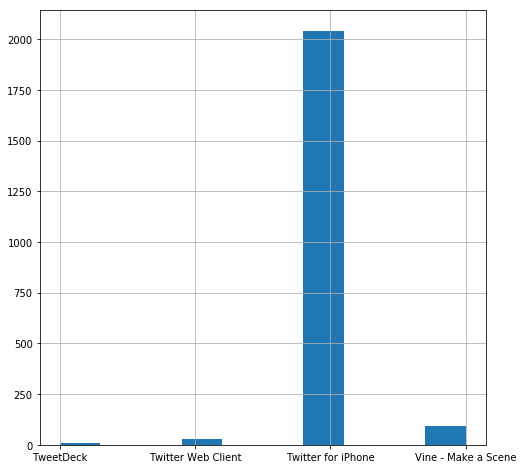

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

twitter_archive_master['source'].hist(figsize=(8,8));

In [45]:
#get sum of favorite counts per dog stage
NoOfLikes_perDogStage = twitter_archive_master.groupby('dog_stage')['favorite_count'].sum()
#get sum of retweet counts per dog stage
NoOfRetwts_perDogStage = twitter_archive_master.groupby('dog_stage')['retweet_count'].sum()

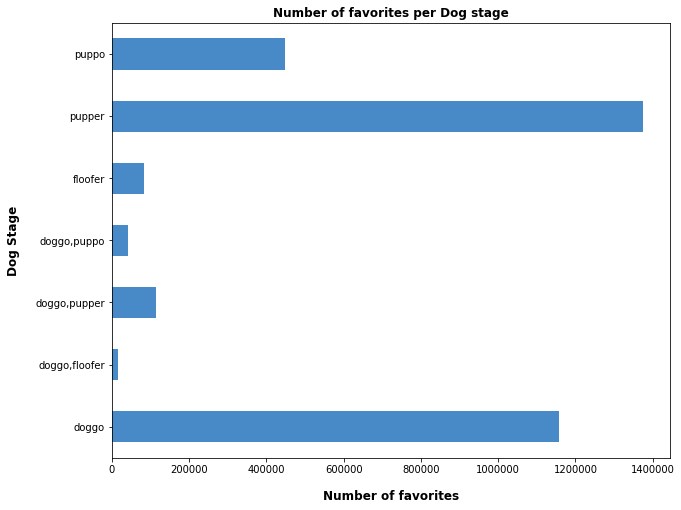

In [46]:
NoOfLikes_perDogStage.plot(kind='barh', figsize =(10,8), color="#488AC7");
plt.title("Number of favorites per Dog stage",weight ='bold')
plt.xlabel("Number of favorites", labelpad=15, weight='bold',size=12)
plt.ylabel("Dog Stage",labelpad=15, weight='bold',size=12);

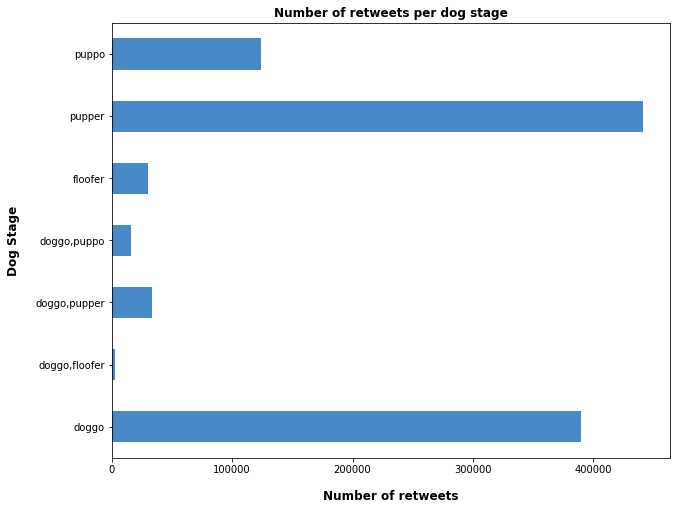

In [47]:
NoOfRetwts_perDogStage.plot(kind='barh', figsize =(10,8), color="#488AC7");
plt.title("Number of retweets per dog stage",weight ='bold')
plt.xlabel("Number of retweets", labelpad=15, weight='bold',size=12)
plt.ylabel("Dog Stage",labelpad=15, weight='bold',size=12);

### Insights: <a class="anchor" id="insights"></a>
1. Majority of the tweets were from 'Twitter for iPhone'


2. Unfortunately, most of the dog stages are unknown. However, the pupper stage has the most number of likes. The floofer stage has the least number of likes if the doggo,pupper and doggo,floofer are not considered.


3. Similar to the favorite count above, the pupper stage accounts for the most retweets. 

### Visualization <a class="anchor" id="visualization"></a>

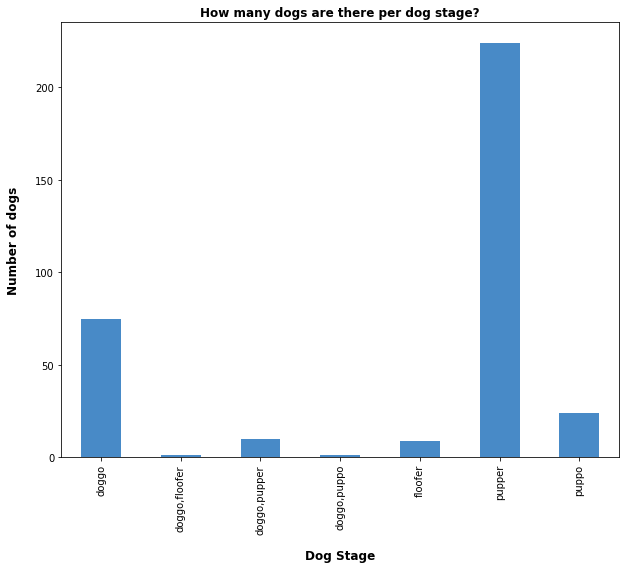

In [42]:
#get dog count per dog stage
NoOfDogs_perDogStage = twitter_archive_master.groupby('dog_stage')['tweet_id'].count()


NoOfDogs_perDogStage.plot(kind='bar', figsize =(10,8), color="#488AC7");
plt.title("How many dogs are there per dog stage?",weight ='bold')
plt.xlabel("Dog Stage", labelpad=15, weight='bold',size=12)
plt.ylabel("Number of dogs",labelpad=15, weight='bold',size=12);

## Reference
<a class="anchor" id="reference"></a>
1. Merging dog stage columns : https://github.com/bromero26/we-rate-dogs

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])